In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Cargamos el archivo csv
df=pd.read_csv('Datos_limpios_Los_Angeles_Estados_Unidos.csv')
#Eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,45540,city scrape,The whole group will enjoy easy access to ever...,No overview available,Moon,41294.0,within a few hours,f,Brentwood,"['email', 'phone']",...,4.90,5.00,5.0,4.90,4.80,3.9,4.0,0.2,0.0,0.80
1,45540,previous scrape,No description available,No overview available,Ida,43668.0,Unknown,f,South Robertson,"['email', 'phone']",...,4.90,5.00,5.0,4.90,4.80,1.0,1.0,0.0,0.0,0.80
2,45540,city scrape,"Charming, renovated home in the Beverly Hills ...",No overview available,Tiana,45054.0,within a day,f,Unknown,"['email', 'phone']",...,4.90,5.00,5.0,4.90,4.80,4.0,4.0,0.0,0.0,0.80
3,45539,city scrape,Relax in this unique and serene retreat.,No overview available,Dan,44522.0,a few days or more,f,Walnut Valley,['phone'],...,5.00,5.00,5.0,5.00,4.80,4.0,1.0,0.2,0.0,0.06
4,45540,city scrape,Welcome to our stunning apartment nestled in t...,No overview available,Farkhat,45136.0,within an hour,t,Downtown,['phone'],...,4.98,4.93,5.0,4.73,4.77,3.0,3.0,0.0,0.0,3.41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  45533 non-null  int64  
 1   source                                        45533 non-null  object 
 2   description                                   45533 non-null  object 
 3   neighborhood_overview                         45533 non-null  object 
 4   host_name                                     45533 non-null  object 
 5   host_since                                    45533 non-null  float64
 6   host_response_time                            45533 non-null  object 
 7   host_is_superhost                             45533 non-null  object 
 8   host_neighbourhood                            45533 non-null  object 
 9   host_verifications                            45533 non-null 

In [4]:
f1=df.iloc[ :  , [7,11,13,14,15,19,20,24,27,40] ]
f1

,host_is_superhost,host_identity_verified,property_type,room_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
0,f,t,Entire condo,Entire home/apt,3 baths,f,0.90,6.0,399.0,4.90
1,f,f,Entire rental unit,Entire home/apt,2 baths,f,0.90,2.0,289.4,4.90
2,f,t,Entire home,Entire home/apt,3 baths,f,0.90,6.0,434.0,4.90
3,f,t,Private room in home,Private room,1 private bath,f,0.90,2.0,49.0,5.00
4,t,t,Entire rental unit,Entire home/apt,1 bath,t,0.95,2.0,231.0,4.98
...,...,...,...,...,...,...,...,...,...,...
45528,f,t,Entire rental unit,Entire home/apt,2 baths,f,1.00,2.0,289.4,4.90
45529,f,t,Entire rental unit,Entire home/apt,1 bath,f,0.90,3.0,289.4,4.90
45530,f,t,Room in boutique hotel,Private room,1 private bath,t,1.00,5.0,289.4,4.90
45531,t,t,Entire home,Entire home/apt,1 bath,t,1.00,2.0,116.0,4.73


In [5]:
#Convertimos las columnas String a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0.0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

#from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()
#df['property_type'] = encoder.fit_transform(df['property_type'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Convertimos la columna "property_type" en categorico.
#Convertimos la columna "property_type" en categorico.
frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)
print(f1[['property_type']])

#Extraemos los solo los numeros de la columna "bathrooms_text"
f1["bathrooms_text"] = f1["bathrooms_text"].str.extract("(\d+\.?\d*)").astype(float)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\angel\AppData\Local\Temp\ipykernel_22192\1295352310.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0.0, 't': 1})
C:\Users\angel\AppData\Local\Temp\ipykernel_22192\1295352310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0.0, 't': 1})
C:\Users\angel\AppData\Local\Temp\ipykernel_22192\1295352310.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be 

       property_type
0               1754
1              11723
2              12391
3               5830
4              11723
...              ...
45528          11723
45529          11723
45530            218
45531          12391
45532          12391

[45533 rows x 1 columns]


C:\Users\angel\AppData\Local\Temp\ipykernel_22192\1295352310.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['property_type'] = f1['property_type'].map(frecuencias)
C:\Users\angel\AppData\Local\Temp\ipykernel_22192\1295352310.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1["bathrooms_text"] = f1["bathrooms_text"].str.extract("(\d+\.?\d*)").astype(float)
C:\Users\angel\AppData\Local\Temp\ipykernel_22192\1295352310.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [6]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]
#f3 = Private room
f3= f1[(f1["room_type"] == 2)]
#f4 = Hotel room
f4= f1[(f1["room_type"] == 3)]
#f5 = Shared room
f5= f1[(f1["room_type"] == 4)]


In [7]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33612 entries, 0 to 45532
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_is_superhost          33612 non-null  float64
 1   host_identity_verified     33612 non-null  int64  
 2   property_type              33612 non-null  int64  
 3   room_type                  33612 non-null  int64  
 4   bathrooms_text             33568 non-null  float64
 5   instant_bookable           33612 non-null  int64  
 6   host_acceptance_rate       33612 non-null  float64
 7   accommodates               33612 non-null  float64
 8   price                      33612 non-null  float64
 9   review_scores_cleanliness  33612 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 2.8 MB


<Axes: xlabel='room_type', ylabel='price'>

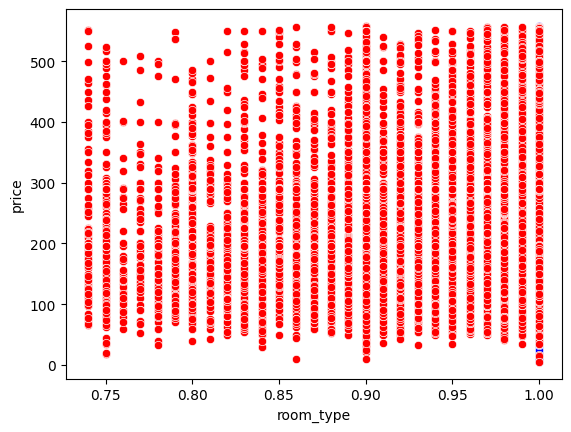

In [8]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
#para observar el comportamiento en su dispersión 

from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_acceptance_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

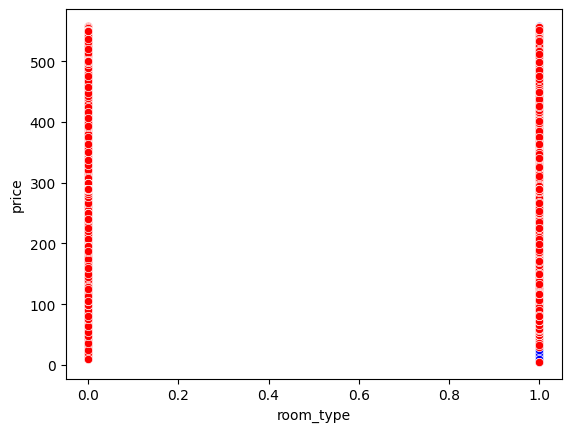

In [9]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

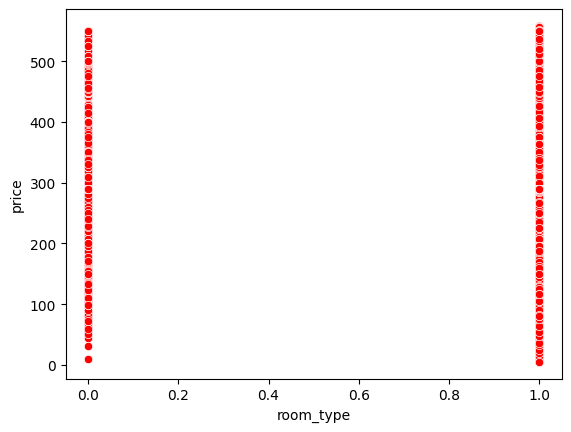

In [10]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

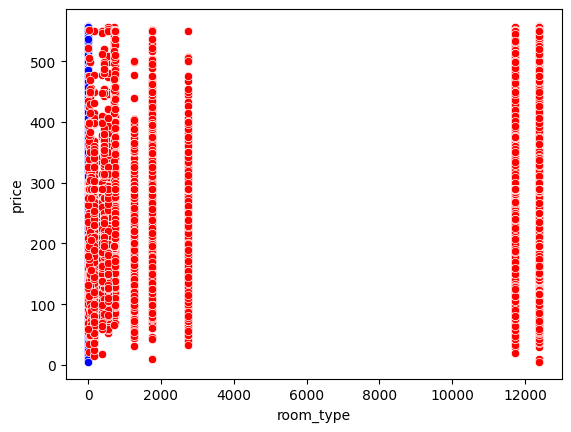

In [11]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

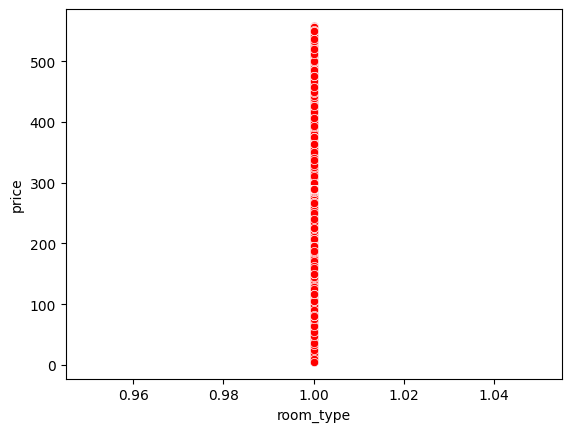

In [12]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

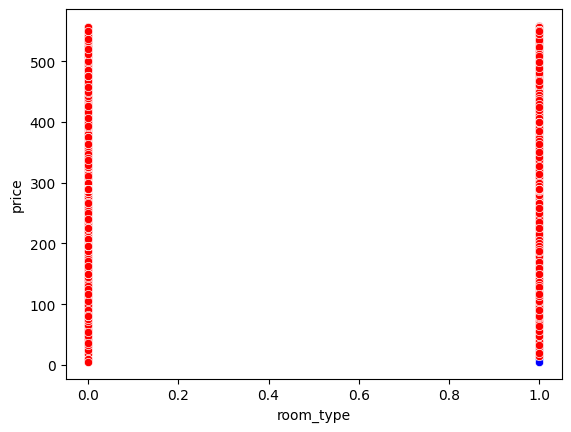

In [13]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

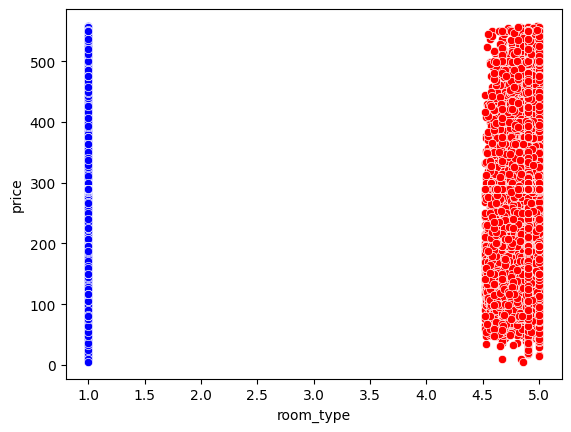

In [14]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

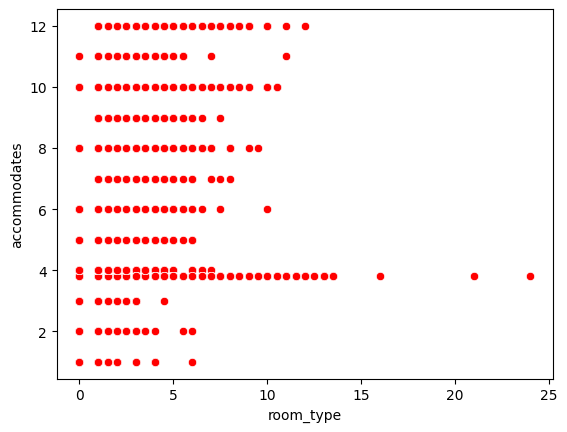

In [15]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms_text', y='accommodates', color='red', data=f2)

**DECLARACIÓN DE VARIABLES INDEPENDIENTES Y DEPENDIENTES**

In [16]:
#declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep= f2[['host_acceptance_rate']]
Var_Dep= f2['price']

In [17]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]

In [18]:
#variables accommodates vs bathrooms
Var_Indep8= f2[['bathrooms_text']]
Var_Dep2= f2['accommodates']

**DEFINICIÓN DEL MODELO**

In [19]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [20]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [21]:
Var_Indep8.fillna(Var_Indep8.mean(), inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_22192\3669119468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Var_Indep8.fillna(Var_Indep8.mean(), inplace=True)


In [22]:
print(Var_Indep8.isna().sum())

bathrooms_text    0
dtype: int64


In [23]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

**COEFICIENTES OBTENIDOS PARA NUESTROS MODELOS**

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-78.24188161]),
 'rank_': 1,
 'singular_': array([10.98501896]),
 'intercept_': np.float64(285.86074423332326)}

In [25]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-11.74032867]),
 'rank_': 1,
 'singular_': array([90.33452645]),
 'intercept_': np.float64(217.333038348083)}

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(212.460445674164)}

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-6.33953875]),
 'rank_': 1,
 'singular_': array([53.88357675]),
 'intercept_': np.float64(218.19454828660403)}

In [28]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00263729]),
 'rank_': 1,
 'singular_': array([880493.69158229]),
 'intercept_': np.float64(188.5289887417771)}

In [29]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-9.40923792]),
 'rank_': 1,
 'singular_': array([82.00897333]),
 'intercept_': np.float64(215.06301871272862)}

In [30]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([35.52462432]),
 'rank_': 1,
 'singular_': array([19.03363442]),
 'intercept_': np.float64(38.830567900089136)}

In [31]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms_text'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.25261532]),
 'rank_': 1,
 'singular_': array([220.97416634]),
 'intercept_': np.float64(2.3146551477379744)}

**A PARTIR DE AQUÍ PREDECIMOS VALORES DE ACUERDO AL MODELO MATEMÁTICO**

**Modelo matemático y=-0.94114872x + 1327.73304431**

In [32]:
#predecimos valores
y_pred= model.predict(X=f2[['host_acceptance_rate']])
y_pred

array([215.44305078, 215.44305078, 215.44305078, ..., 215.44305078,
       207.61886262, 215.44305078], shape=(33612,))

In [33]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([217.33303835, 217.33303835, 217.33303835, ..., 217.33303835,
       205.59270968, 217.33303835], shape=(33612,))

In [34]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([212.46044567, 212.46044567, 212.46044567, ..., 212.46044567,
       212.46044567, 212.46044567], shape=(33612,))

In [35]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([211.85500954, 218.19454829, 211.85500954, ..., 211.85500954,
       211.85500954, 211.85500954], shape=(33612,))

In [36]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([193.15479367, 219.44592783, 221.20763689, ..., 219.44592783,
       221.20763689, 221.20763689], shape=(33612,))

In [37]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([215.06301871, 215.06301871, 215.06301871, ..., 215.06301871,
       205.65378079, 215.06301871], shape=(33612,))

In [38]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([212.90122708, 212.90122708, 212.90122708, ..., 212.90122708,
       206.86204094, 210.41450338], shape=(33612,))

In [39]:
f2['bathrooms_text'].fillna(f2['bathrooms_text'].mean(), inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_22192\3283255042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  f2['bathrooms_text'].fillna(f2['bathrooms_text'].mean(), inplace=True)
C:\Users\angel\AppData\Local\Temp\ipykernel_22192\3283255042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['bathrooms_text'].fillna(f2['bathrooms_text']

In [40]:
y_pred8= model8.predict(X=f2[['bathrooms_text']])
y_pred8

array([6.0725011 , 4.81988578, 6.0725011 , ..., 3.56727046, 3.56727046,
       5.44619344], shape=(33612,))

**INSERTAMOS LA COLUMNA DE PREDICCIONES A NUESTRO DATAFRAME**

In [41]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Predicciones1', y_pred)
f2

,Predicciones1,host_is_superhost,host_identity_verified,property_type,room_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
0,215.443051,0.0,1,1754,1,3.0,0,0.90,6.0,399.0,4.90
1,215.443051,0.0,0,11723,1,2.0,0,0.90,2.0,289.4,4.90
2,215.443051,0.0,1,12391,1,3.0,0,0.90,6.0,434.0,4.90
4,211.530957,1.0,1,11723,1,1.0,1,0.95,2.0,231.0,4.98
6,221.702401,0.0,0,12391,1,1.0,0,0.82,7.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...
45527,215.443051,0.0,0,12391,1,1.0,0,0.90,6.0,289.4,5.00
45528,207.618863,0.0,1,11723,1,2.0,0,1.00,2.0,289.4,4.90
45529,215.443051,0.0,1,11723,1,1.0,0,0.90,3.0,289.4,4.90
45531,207.618863,1.0,1,12391,1,1.0,1,1.00,2.0,116.0,4.73


In [42]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Predicciones2', y_pred2)
f2

,Predicciones1,Predicciones2,host_is_superhost,host_identity_verified,property_type,room_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
0,215.443051,217.333038,0.0,1,1754,1,3.0,0,0.90,6.0,399.0,4.90
1,215.443051,217.333038,0.0,0,11723,1,2.0,0,0.90,2.0,289.4,4.90
2,215.443051,217.333038,0.0,1,12391,1,3.0,0,0.90,6.0,434.0,4.90
4,211.530957,205.592710,1.0,1,11723,1,1.0,1,0.95,2.0,231.0,4.98
6,221.702401,217.333038,0.0,0,12391,1,1.0,0,0.82,7.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...
45527,215.443051,217.333038,0.0,0,12391,1,1.0,0,0.90,6.0,289.4,5.00
45528,207.618863,217.333038,0.0,1,11723,1,2.0,0,1.00,2.0,289.4,4.90
45529,215.443051,217.333038,0.0,1,11723,1,1.0,0,0.90,3.0,289.4,4.90
45531,207.618863,205.592710,1.0,1,12391,1,1.0,1,1.00,2.0,116.0,4.73


In [43]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Predicciones3', y_pred3)
f2

,Predicciones1,Predicciones2,Predicciones3,host_is_superhost,host_identity_verified,property_type,room_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
0,215.443051,217.333038,212.460446,0.0,1,1754,1,3.0,0,0.90,6.0,399.0,4.90
1,215.443051,217.333038,212.460446,0.0,0,11723,1,2.0,0,0.90,2.0,289.4,4.90
2,215.443051,217.333038,212.460446,0.0,1,12391,1,3.0,0,0.90,6.0,434.0,4.90
4,211.530957,205.592710,212.460446,1.0,1,11723,1,1.0,1,0.95,2.0,231.0,4.98
6,221.702401,217.333038,212.460446,0.0,0,12391,1,1.0,0,0.82,7.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,215.443051,217.333038,212.460446,0.0,0,12391,1,1.0,0,0.90,6.0,289.4,5.00
45528,207.618863,217.333038,212.460446,0.0,1,11723,1,2.0,0,1.00,2.0,289.4,4.90
45529,215.443051,217.333038,212.460446,0.0,1,11723,1,1.0,0,0.90,3.0,289.4,4.90
45531,207.618863,205.592710,212.460446,1.0,1,12391,1,1.0,1,1.00,2.0,116.0,4.73


In [44]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Predicciones4', y_pred4)
f2

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,host_is_superhost,host_identity_verified,property_type,room_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
0,215.443051,217.333038,212.460446,211.855010,0.0,1,1754,1,3.0,0,0.90,6.0,399.0,4.90
1,215.443051,217.333038,212.460446,218.194548,0.0,0,11723,1,2.0,0,0.90,2.0,289.4,4.90
2,215.443051,217.333038,212.460446,211.855010,0.0,1,12391,1,3.0,0,0.90,6.0,434.0,4.90
4,211.530957,205.592710,212.460446,211.855010,1.0,1,11723,1,1.0,1,0.95,2.0,231.0,4.98
6,221.702401,217.333038,212.460446,218.194548,0.0,0,12391,1,1.0,0,0.82,7.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,215.443051,217.333038,212.460446,218.194548,0.0,0,12391,1,1.0,0,0.90,6.0,289.4,5.00
45528,207.618863,217.333038,212.460446,211.855010,0.0,1,11723,1,2.0,0,1.00,2.0,289.4,4.90
45529,215.443051,217.333038,212.460446,211.855010,0.0,1,11723,1,1.0,0,0.90,3.0,289.4,4.90
45531,207.618863,205.592710,212.460446,211.855010,1.0,1,12391,1,1.0,1,1.00,2.0,116.0,4.73


In [45]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Predicciones5', y_pred5)
f2

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,host_is_superhost,host_identity_verified,property_type,room_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
0,215.443051,217.333038,212.460446,211.855010,193.154794,0.0,1,1754,1,3.0,0,0.90,6.0,399.0,4.90
1,215.443051,217.333038,212.460446,218.194548,219.445928,0.0,0,11723,1,2.0,0,0.90,2.0,289.4,4.90
2,215.443051,217.333038,212.460446,211.855010,221.207637,0.0,1,12391,1,3.0,0,0.90,6.0,434.0,4.90
4,211.530957,205.592710,212.460446,211.855010,219.445928,1.0,1,11723,1,1.0,1,0.95,2.0,231.0,4.98
6,221.702401,217.333038,212.460446,218.194548,221.207637,0.0,0,12391,1,1.0,0,0.82,7.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,215.443051,217.333038,212.460446,218.194548,221.207637,0.0,0,12391,1,1.0,0,0.90,6.0,289.4,5.00
45528,207.618863,217.333038,212.460446,211.855010,219.445928,0.0,1,11723,1,2.0,0,1.00,2.0,289.4,4.90
45529,215.443051,217.333038,212.460446,211.855010,219.445928,0.0,1,11723,1,1.0,0,0.90,3.0,289.4,4.90
45531,207.618863,205.592710,212.460446,211.855010,221.207637,1.0,1,12391,1,1.0,1,1.00,2.0,116.0,4.73


In [46]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Predicciones6', y_pred6)
f2

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,Predicciones6,host_is_superhost,host_identity_verified,property_type,room_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
0,215.443051,217.333038,212.460446,211.855010,193.154794,215.063019,0.0,1,1754,1,3.0,0,0.90,6.0,399.0,4.90
1,215.443051,217.333038,212.460446,218.194548,219.445928,215.063019,0.0,0,11723,1,2.0,0,0.90,2.0,289.4,4.90
2,215.443051,217.333038,212.460446,211.855010,221.207637,215.063019,0.0,1,12391,1,3.0,0,0.90,6.0,434.0,4.90
4,211.530957,205.592710,212.460446,211.855010,219.445928,205.653781,1.0,1,11723,1,1.0,1,0.95,2.0,231.0,4.98
6,221.702401,217.333038,212.460446,218.194548,221.207637,215.063019,0.0,0,12391,1,1.0,0,0.82,7.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,215.443051,217.333038,212.460446,218.194548,221.207637,215.063019,0.0,0,12391,1,1.0,0,0.90,6.0,289.4,5.00
45528,207.618863,217.333038,212.460446,211.855010,219.445928,215.063019,0.0,1,11723,1,2.0,0,1.00,2.0,289.4,4.90
45529,215.443051,217.333038,212.460446,211.855010,219.445928,215.063019,0.0,1,11723,1,1.0,0,0.90,3.0,289.4,4.90
45531,207.618863,205.592710,212.460446,211.855010,221.207637,205.653781,1.0,1,12391,1,1.0,1,1.00,2.0,116.0,4.73


In [47]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Predicciones7', y_pred7)
f2

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,Predicciones6,Predicciones7,host_is_superhost,host_identity_verified,property_type,room_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
0,215.443051,217.333038,212.460446,211.855010,193.154794,215.063019,212.901227,0.0,1,1754,1,3.0,0,0.90,6.0,399.0,4.90
1,215.443051,217.333038,212.460446,218.194548,219.445928,215.063019,212.901227,0.0,0,11723,1,2.0,0,0.90,2.0,289.4,4.90
2,215.443051,217.333038,212.460446,211.855010,221.207637,215.063019,212.901227,0.0,1,12391,1,3.0,0,0.90,6.0,434.0,4.90
4,211.530957,205.592710,212.460446,211.855010,219.445928,205.653781,215.743197,1.0,1,11723,1,1.0,1,0.95,2.0,231.0,4.98
6,221.702401,217.333038,212.460446,218.194548,221.207637,215.063019,212.901227,0.0,0,12391,1,1.0,0,0.82,7.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,215.443051,217.333038,212.460446,218.194548,221.207637,215.063019,216.453690,0.0,0,12391,1,1.0,0,0.90,6.0,289.4,5.00
45528,207.618863,217.333038,212.460446,211.855010,219.445928,215.063019,212.901227,0.0,1,11723,1,2.0,0,1.00,2.0,289.4,4.90
45529,215.443051,217.333038,212.460446,211.855010,219.445928,215.063019,212.901227,0.0,1,11723,1,1.0,0,0.90,3.0,289.4,4.90
45531,207.618863,205.592710,212.460446,211.855010,221.207637,205.653781,206.862041,1.0,1,12391,1,1.0,1,1.00,2.0,116.0,4.73


In [48]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Predicciones8', y_pred8)
f2

,Predicciones1,Predicciones2,Predicciones3,Predicciones4,Predicciones5,Predicciones6,Predicciones7,Predicciones8,host_is_superhost,host_identity_verified,property_type,room_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
0,215.443051,217.333038,212.460446,211.855010,193.154794,215.063019,212.901227,6.072501,0.0,1,1754,1,3.0,0,0.90,6.0,399.0,4.90
1,215.443051,217.333038,212.460446,218.194548,219.445928,215.063019,212.901227,4.819886,0.0,0,11723,1,2.0,0,0.90,2.0,289.4,4.90
2,215.443051,217.333038,212.460446,211.855010,221.207637,215.063019,212.901227,6.072501,0.0,1,12391,1,3.0,0,0.90,6.0,434.0,4.90
4,211.530957,205.592710,212.460446,211.855010,219.445928,205.653781,215.743197,3.567270,1.0,1,11723,1,1.0,1,0.95,2.0,231.0,4.98
6,221.702401,217.333038,212.460446,218.194548,221.207637,215.063019,212.901227,3.567270,0.0,0,12391,1,1.0,0,0.82,7.0,110.0,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,215.443051,217.333038,212.460446,218.194548,221.207637,215.063019,216.453690,3.567270,0.0,0,12391,1,1.0,0,0.90,6.0,289.4,5.00
45528,207.618863,217.333038,212.460446,211.855010,219.445928,215.063019,212.901227,4.819886,0.0,1,11723,1,2.0,0,1.00,2.0,289.4,4.90
45529,215.443051,217.333038,212.460446,211.855010,219.445928,215.063019,212.901227,3.567270,0.0,1,11723,1,1.0,0,0.90,3.0,289.4,4.90
45531,207.618863,205.592710,212.460446,211.855010,221.207637,205.653781,206.862041,3.567270,1.0,1,12391,1,1.0,1,1.00,2.0,116.0,4.73


**GRÁFICAS COMPARATIVAS**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

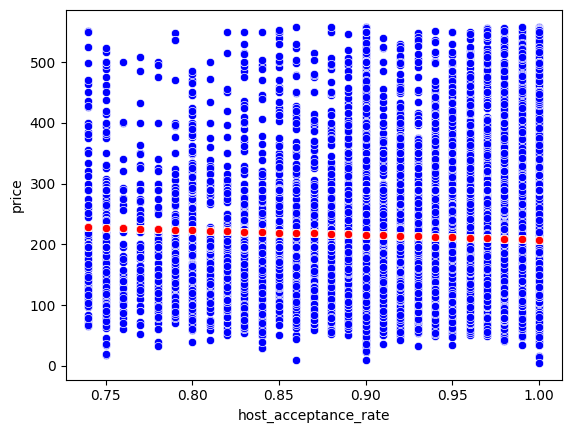

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones1', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

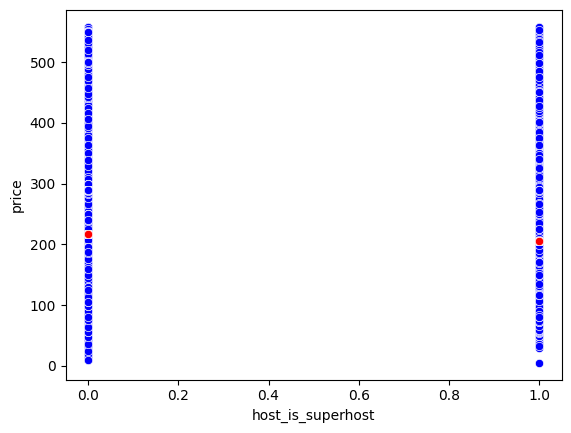

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

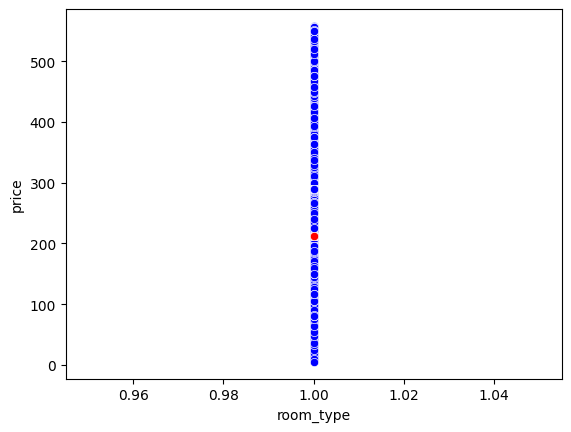

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Predicciones3', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

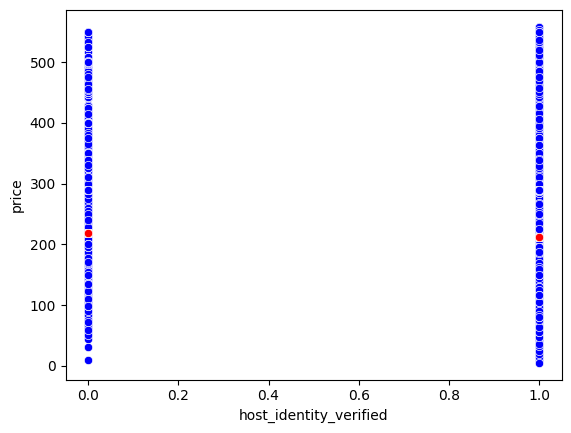

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Predicciones4', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

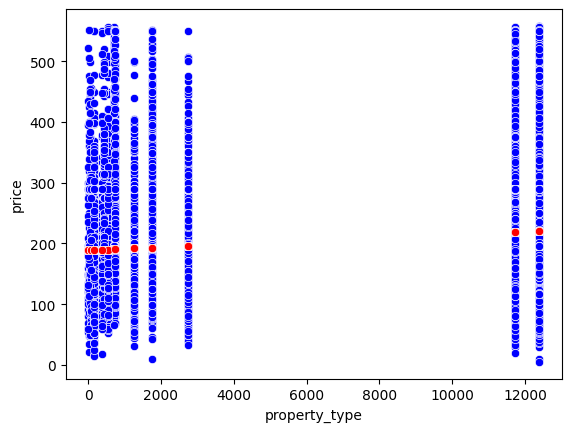

In [53]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Predicciones5', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

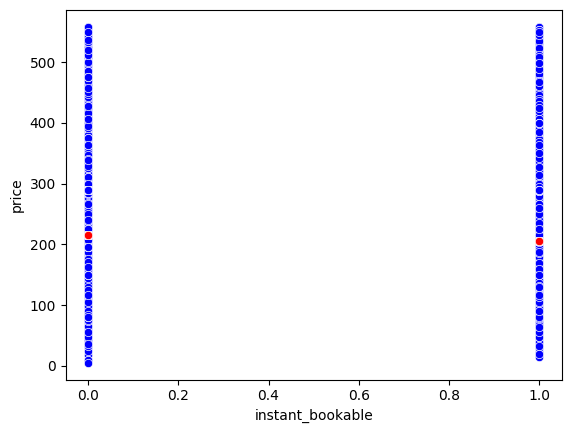

In [54]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Predicciones6', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

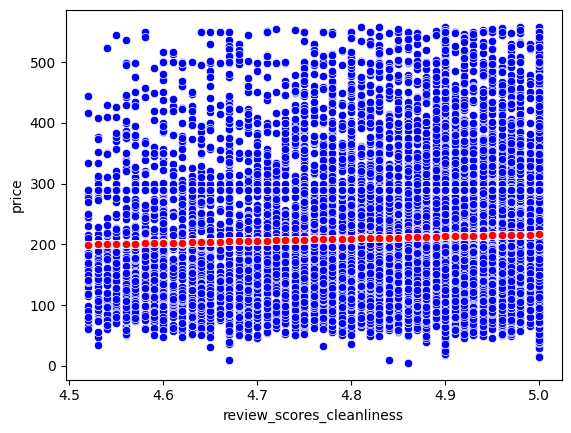

In [55]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones7', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='bathrooms_text', ylabel='accommodates'>

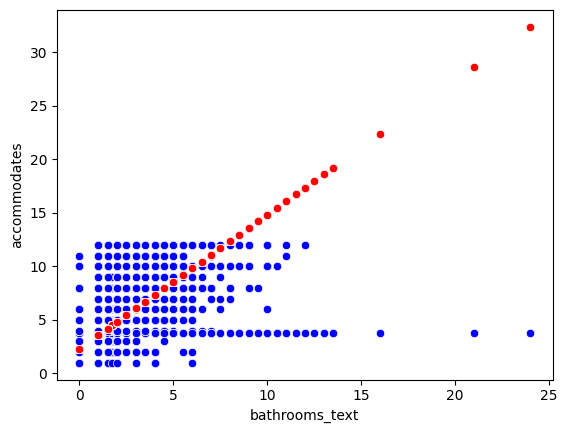

In [56]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='bathrooms_text', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms_text', y='Predicciones8', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**COEFICIENTES DE DETERMINACIÓN**

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.0022919824557769974

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.003489788846247177

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [60]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.00036204224469305046

In [61]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.01673011952441028

In [62]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.0018474076854906318

In [63]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.0014185136855273672

In [64]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.3665916860309113

**COEFICIENTES DE CORRELACIÓN**

In [65]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.04787465358388505)

In [66]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.059074434794140665)

In [67]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.059074434794140665)

In [68]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.01902740772393997)

In [69]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.1293449632742237)

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.04298148072706002)

In [71]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.03766316085417377)

In [72]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.6054681544316854)

In [73]:
#eliminamos room_type y su prediccion 

f2= f2.drop(['room_type', 'Predicciones3' ], axis=1)

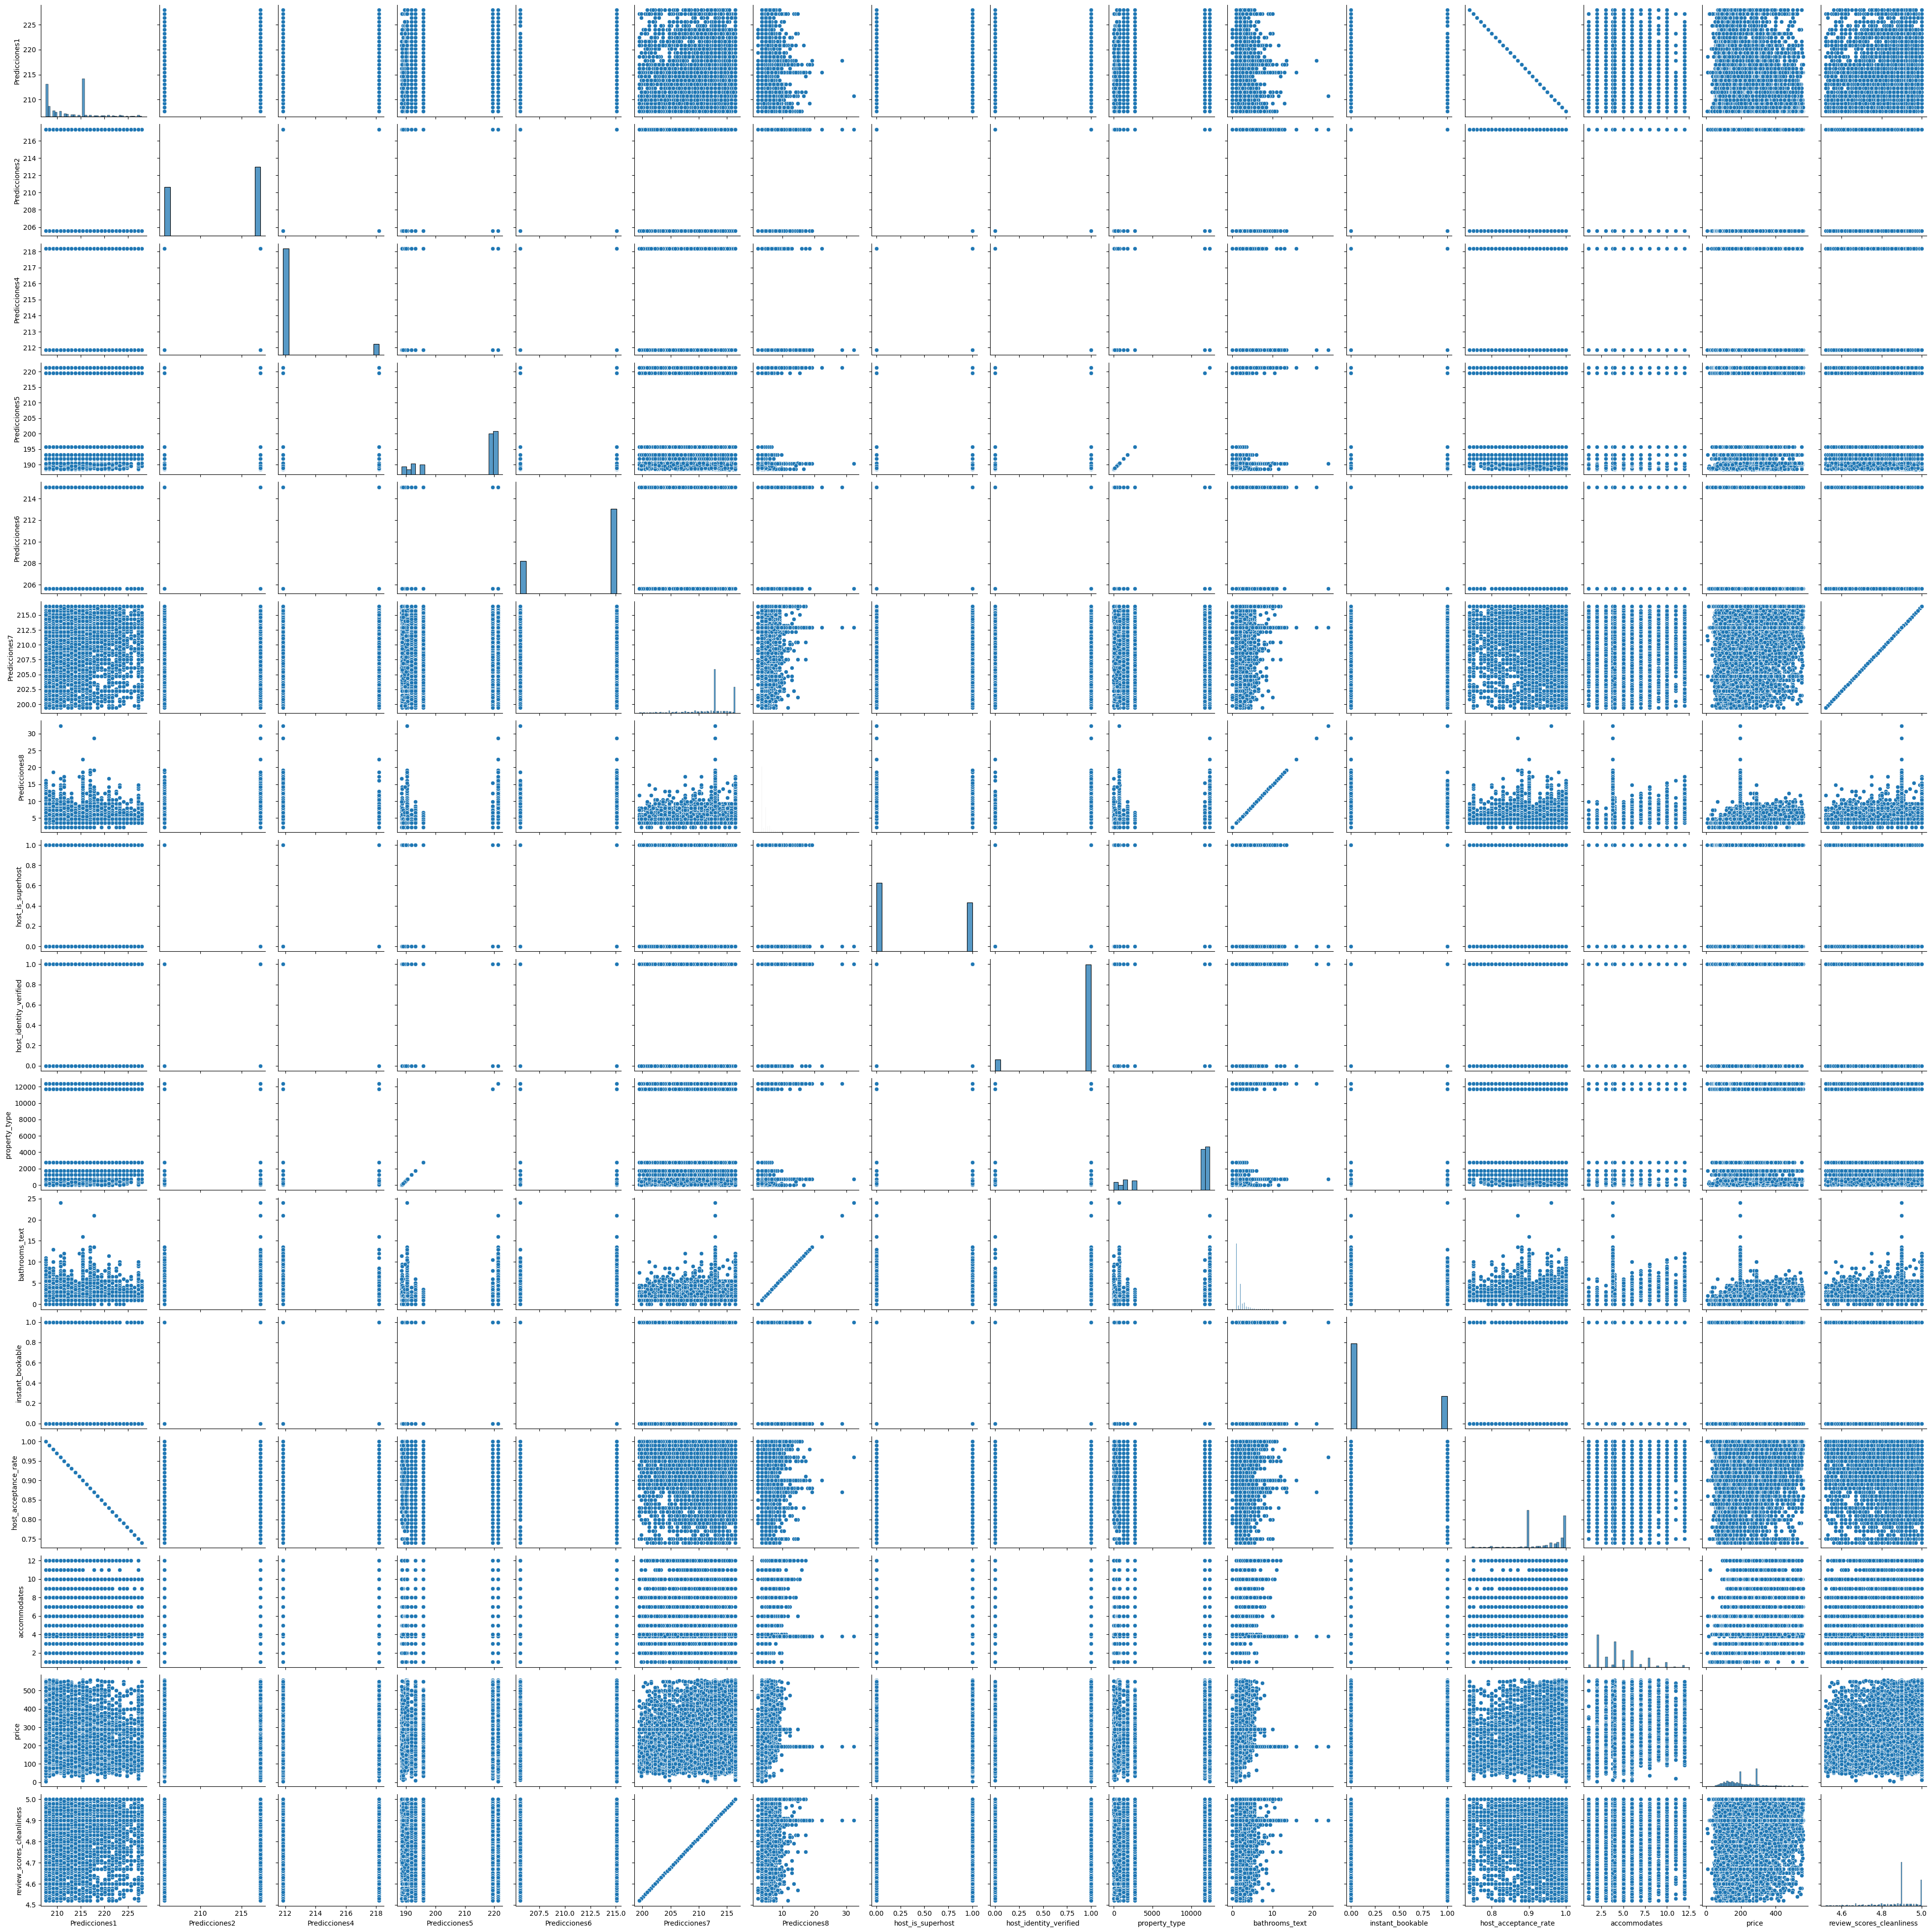

In [74]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [75]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Predicciones1,Predicciones2,Predicciones4,Predicciones5,Predicciones6,Predicciones7,Predicciones8,host_is_superhost,host_identity_verified,property_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
Predicciones1,1.000000,0.243268,0.038969,0.009442,0.313359,0.044803,0.056397,-0.243268,-0.038969,0.009442,0.056397,-0.313359,-1.000000,-0.038448,0.047875,0.044803
Predicciones2,0.243268,1.000000,0.059424,0.053136,-0.007632,-0.024101,-0.001872,-1.000000,-0.059424,0.053136,-0.001872,0.007632,-0.243268,-0.043936,0.059074,-0.024101
Predicciones4,0.038969,0.059424,1.000000,-0.045061,0.056321,0.004679,-0.041495,-0.059424,-1.000000,-0.045061,-0.041495,-0.056321,-0.038969,-0.040483,0.019027,0.004679
Predicciones5,0.009442,0.053136,-0.045061,1.000000,-0.052480,-0.014846,0.094887,-0.053136,0.045061,1.000000,0.094887,0.052480,-0.009442,0.186108,0.129345,-0.014846
Predicciones6,0.313359,-0.007632,0.056321,-0.052480,1.000000,0.036097,0.038654,0.007632,-0.056321,-0.052480,0.038654,-1.000000,-0.313359,-0.024342,0.042981,0.036097
Predicciones7,0.044803,-0.024101,0.004679,-0.014846,0.036097,1.000000,0.013832,0.024101,-0.004679,-0.014846,0.013832,-0.036097,-0.044803,-0.043260,0.037663,1.000000
Predicciones8,0.056397,-0.001872,-0.041495,0.094887,0.038654,0.013832,1.000000,0.001872,0.041495,0.094887,1.000000,-0.038654,-0.056397,0.605468,0.272954,0.013832
host_is_superhost,-0.243268,-1.000000,-0.059424,-0.053136,0.007632,0.024101,0.001872,1.000000,0.059424,-0.053136,0.001872,-0.007632,0.243268,0.043936,-0.059074,0.024101
host_identity_verified,-0.038969,-0.059424,-1.000000,0.045061,-0.056321,-0.004679,0.041495,0.059424,1.000000,0.045061,0.041495,0.056321,0.038969,0.040483,-0.019027,-0.004679
property_type,0.009442,0.053136,-0.045061,1.000000,-0.052480,-0.014846,0.094887,-0.053136,0.045061,1.000000,0.094887,0.052480,-0.009442,0.186108,0.129345,-0.014846


In [76]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones1,Predicciones2,Predicciones4,Predicciones5,Predicciones6,Predicciones7,Predicciones8,host_is_superhost,host_identity_verified,property_type,bathrooms_text,instant_bookable,host_acceptance_rate,accommodates,price,review_scores_cleanliness
Predicciones1,1.000000,0.243268,0.038969,0.009442,0.313359,0.044803,0.056397,0.243268,0.038969,0.009442,0.056397,0.313359,1.000000,0.038448,0.047875,0.044803
Predicciones2,0.243268,1.000000,0.059424,0.053136,0.007632,0.024101,0.001872,1.000000,0.059424,0.053136,0.001872,0.007632,0.243268,0.043936,0.059074,0.024101
Predicciones4,0.038969,0.059424,1.000000,0.045061,0.056321,0.004679,0.041495,0.059424,1.000000,0.045061,0.041495,0.056321,0.038969,0.040483,0.019027,0.004679
Predicciones5,0.009442,0.053136,0.045061,1.000000,0.052480,0.014846,0.094887,0.053136,0.045061,1.000000,0.094887,0.052480,0.009442,0.186108,0.129345,0.014846
Predicciones6,0.313359,0.007632,0.056321,0.052480,1.000000,0.036097,0.038654,0.007632,0.056321,0.052480,0.038654,1.000000,0.313359,0.024342,0.042981,0.036097
Predicciones7,0.044803,0.024101,0.004679,0.014846,0.036097,1.000000,0.013832,0.024101,0.004679,0.014846,0.013832,0.036097,0.044803,0.043260,0.037663,1.000000
Predicciones8,0.056397,0.001872,0.041495,0.094887,0.038654,0.013832,1.000000,0.001872,0.041495,0.094887,1.000000,0.038654,0.056397,0.605468,0.272954,0.013832
host_is_superhost,0.243268,1.000000,0.059424,0.053136,0.007632,0.024101,0.001872,1.000000,0.059424,0.053136,0.001872,0.007632,0.243268,0.043936,0.059074,0.024101
host_identity_verified,0.038969,0.059424,1.000000,0.045061,0.056321,0.004679,0.041495,0.059424,1.000000,0.045061,0.041495,0.056321,0.038969,0.040483,0.019027,0.004679
property_type,0.009442,0.053136,0.045061,1.000000,0.052480,0.014846,0.094887,0.053136,0.045061,1.000000,0.094887,0.052480,0.009442,0.186108,0.129345,0.014846


<Axes: >

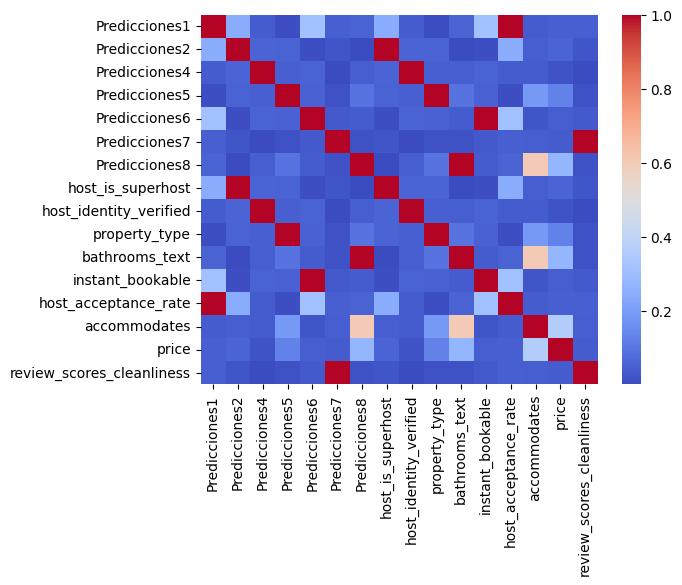

In [77]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

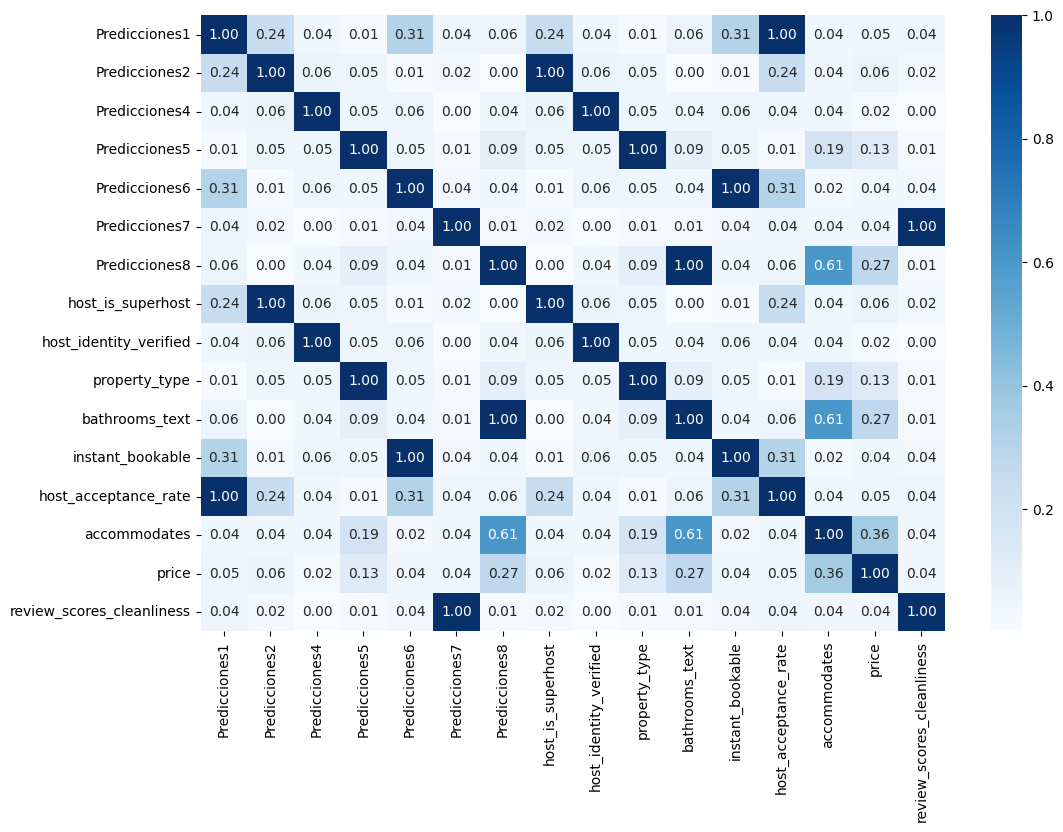

In [78]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Blues', annot=True, fmt=".2f")
Heart_Nap

In [79]:
import numpy as np

print(np.isnan(Corr_Factors1).sum())  # Ver cuántos valores NaN hay


Predicciones1                0
Predicciones2                0
Predicciones4                0
Predicciones5                0
Predicciones6                0
Predicciones7                0
Predicciones8                0
host_is_superhost            0
host_identity_verified       0
property_type                0
bathrooms_text               0
instant_bookable             0
host_acceptance_rate         0
accommodates                 0
price                        0
review_scores_cleanliness    0
dtype: int64


In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  45533 non-null  int64  
 1   source                                        45533 non-null  object 
 2   description                                   45533 non-null  object 
 3   neighborhood_overview                         45533 non-null  object 
 4   host_name                                     45533 non-null  object 
 5   host_since                                    45533 non-null  float64
 6   host_response_time                            45533 non-null  object 
 7   host_is_superhost                             45533 non-null  object 
 8   host_neighbourhood                            45533 non-null  object 
 9   host_verifications                            45533 non-null 